The task is to predict the day price direction of Amazon.com

In [1]:
import pandas as pd

In [9]:
df_train = pd.read_csv("./Datasets/Stock Price Direction/AMZN_train.csv")
df_test = pd.read_csv("./Datasets/Stock Price Direction/AMZN_test.csv")
df_val= pd.read_csv("./Datasets/Stock Price Direction/AMZN_val.csv")

In [6]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4781 entries, 0 to 4780
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4781 non-null   object 
 1   Open       4781 non-null   float64
 2   High       4781 non-null   float64
 3   Low        4781 non-null   float64
 4   Close      4781 non-null   float64
 5   Adj Close  4781 non-null   float64
 6   Volume     4781 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 261.6+ KB


In [8]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4.781000e+03
mean,127.619845,129.480122,125.697925,127.662449,127.662449,8.225935e+06
std,145.693083,147.132537,144.053633,145.677581,145.677581,7.810188e+06
min,1.406250,1.447917,1.312500,1.395833,1.395833,4.872000e+05
25%,34.299999,34.849998,33.660000,34.310001,34.310001,4.200900e+06
50%,62.880001,64.750000,60.937500,62.750000,62.750000,6.200100e+06
75%,189.009995,191.600006,186.210007,189.029999,189.029999,9.239900e+06
max,717.380005,722.450012,711.510010,717.929993,717.929993,1.043292e+08


In [10]:
# make sure that our data is sorted by date
df_train.sort_values(by="Date", inplace=True)
df_val.sort_values(by="Date", inplace=True)
df_test.sort_values(by="Date", inplace=True)

In [12]:
# notice that we shift by a period of '-1', this takes the next day's price direction for the current day
# a positive period will take the days from the past
df_train["Target"] = (df_train["Close"] > df_train["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_val["Target"] = (df_val["Close"] > df_val["Open"]).shift(periods=-1, fill_value=0).astype(int)
df_test["Target"] = (df_test["Close"] > df_test["Open"]).shift(periods=-1, fill_value=0).astype(int)

## Feature Engineering
- Feature engineering happens after split, to reduce data drift


In [13]:
df_train["Moving_Average_3"] = (df_train["Close"] - df_train["Open"]).rolling(window=3, min_periods=1).mean()
df_val["Moving_Average_3"] = (df_val["Close"] - df_val["Open"]).rolling(window=3, min_periods=1).mean()
df_test["Moving_Average_3"] = (df_test["Close"] - df_test["Open"]).rolling(window=3, min_periods=1).mean()

In [14]:
df_train["Moving_Average_7"] = (df_train["Close"] - df_train["Open"]).rolling(window=7, min_periods=1).mean()
df_val["Moving_Average_7"] = (df_val["Close"] - df_val["Open"]).rolling(window=7, min_periods=1).mean()
df_test["Moving_Average_7"] = (df_test["Close"] - df_test["Open"]).rolling(window=7, min_periods=1).mean()

In [15]:
# current price direction
df_train["Today_Direction"] = df_train["Close"] - df_train["Open"]
df_val["Today_Direction"] = df_val["Close"] - df_val["Open"]
df_test["Today_Direction"] = df_test["Close"] - df_test["Open"]

In [16]:
# price range
df_train["Price_Range"] = df_train["High"] - df_train["Low"]
df_val["Price_Range"] = df_val["High"] - df_val["Low"]
df_test["Price_Range"] = df_test["High"] - df_test["Low"]

In [17]:
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


In [18]:
df_train.sample(10, random_state=42)

,Date,Open,High,Low,Close,Adj Close,Volume,Target,Moving_Average_3,Moving_Average_7,Today_Direction,Price_Range
2895,2008-11-14,43.610001,44.500000,41.500000,41.750000,41.750000,11949700,0,-0.253335,-0.601429,-1.860001,3.000000
4430,2014-12-22,301.940002,307.359985,301.940002,306.540009,306.540009,4003800,0,0.436666,-0.705710,4.600007,5.419983
3618,2011-09-29,234.169998,234.300003,216.289993,222.440002,222.440002,9378500,0,-6.126663,-2.434283,-11.729996,18.010010
763,2000-05-24,46.437500,49.750000,40.437500,48.562500,48.562500,11666600,0,-0.937500,-0.580357,2.125000,9.312500
4392,2014-10-28,289.760010,298.000000,289.760010,295.589996,295.589996,5572600,0,4.253326,2.681423,5.829986,8.239990
4657,2015-11-16,640.919983,649.989990,622.289978,647.809998,647.809998,7435900,0,-7.243347,-0.264299,6.890015,27.700012
4008,2013-04-22,259.350006,264.600006,258.029999,263.549988,263.549988,2119100,1,-0.343333,-0.287140,4.199982,6.570007
555,1999-07-29,51.187500,52.187500,50.000000,50.781250,50.781250,18748000,0,-0.841146,-0.713170,-0.406250,2.187500
2754,2008-04-28,80.639999,82.500000,80.120003,81.970001,81.970001,10991900,0,1.453336,1.212857,1.330002,2.379997
33,1997-07-02,1.515625,1.593750,1.510417,1.588542,1.588542,3882000,1,0.026042,0.004464,0.072917,0.083333


## Classical Machine Learning Algorithms
- After fitting them to the training data, we are going to evaluate their performance on the validation set by estimating the AUC metric.



In [19]:
# this is the target column that we aim to predict
y_col = "Target"
# these are the input features for the models
X_cols = [
    "Open",
    "Close",
    "High",
    "Low",
    "Volume",
    "Adj Close",
    "Today_Direction",
    "Price_Range",
    "Moving_Average_3",
    "Moving_Average_7"
]

In [20]:
X_train = df_train[X_cols]
y_train = df_train[y_col]

X_val = df_val[X_cols]
y_val = df_val[y_col]

X_test = df_val[X_cols]
y_test = df_val[y_col]

## Logistic Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.metrics import classification_report
RANDOM_SEED = 42


# define the classifiers in an array
classifiers = [
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
    KNeighborsClassifier(),
    LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
    LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
    BaggingClassifier(random_state=RANDOM_SEED),
    GaussianNB(),
    RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED),
    ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_SEED)
]

# iterate over the array of classifiers and print their evaluation
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    print(classification_report(y_test,y_pred))
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)
    print('----------------------------------------------------------------------------------------------------------------------------')

/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       255
           1       0.00      0.00      0.00       248

    accuracy                           0.51       503
   macro avg       0.25      0.50      0.34       503
weighted avg       0.26      0.51      0.34       503

SGDClassifier : 0.0
----------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.46      0.47       255
           1       0.46      0.48      0.47       248

    accuracy                           0.47       503
   macro avg       0.47      0.47      0.47       503
weighted avg       0.47      0.47      0.47       503

KNeighborsClassifier : 0.4722222222222222
----------------------------------------------------------------------------------------------------------------------------
              precision    recall 

/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/prashant.singh/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

              precision    recall  f1-score   support

           0       0.51      0.82      0.62       255
           1       0.49      0.18      0.26       248

    accuracy                           0.50       503
   macro avg       0.50      0.50      0.44       503
weighted avg       0.50      0.50      0.45       503

RandomForestClassifier : 0.2647058823529412
----------------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.93      0.66       255
           1       0.54      0.08      0.15       248

    accuracy                           0.51       503
   macro avg       0.52      0.51      0.40       503
weighted avg       0.52      0.51      0.41       503

ExtraTreesClassifier : 0.1463414634146341
----------------------------------------------------------------------------------------------------------------------------


## Deep Learning Algorithm - Sequential

In [27]:
import tensorflow as tf

# set seed for reproducibility of results
tf.random.set_seed(RANDOM_SEED)

print("Tensorflow version", tf.__version__)

Tensorflow version 2.11.0


In [28]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Normalization(axis=-1),
    tf.keras.layers.Dense(10, input_shape=[X_train.shape[1],], activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dropout(0.2, seed=RANDOM_SEED),
    tf.keras.layers.Dense(5, activation="relu", kernel_initializer='random_normal', bias_initializer='zeros'),
    tf.keras.layers.Dense(1, activation="sigmoid", kernel_initializer='random_normal', bias_initializer='zeros')
])

In [29]:
# this configures the model's loss function, weight optimizer, and metrics to keep track of
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)

In [30]:
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

In [31]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50


2024-04-02 13:37:53.259850: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


150/150 [==============================] - 1s 1ms/step - loss: 395.1616 - auc: 0.5018 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50
150/150 [==============================] - 0s 670us/step - loss: 8.0725 - auc: 0.4998 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 3/50
150/150 [==============================] - 0s 742us/step - loss: 2.9414 - auc: 0.5004 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 4/50
150/150 [==============================] - 0s 723us/step - loss: 1.5638 - auc: 0.5057 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 5/50
150/150 [==============================] - 0s 749us/step - loss: 1.7217 - auc: 0.4983 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 0.0010
Epoch 6/50
150/150 [==============================] - 0s 660us/step - loss: 2.0560 - auc: 0.4924 - val_loss: 0.6931 - val_auc: 0.5000 - lr: 9.9005e-04
Epoch 7/50
150/150 [==============================] - 0s 644us/step - loss: 1.0140 - auc: 0.4929 - val_loss: 0.6931 - val_auc

## Deep Learning Algorithm - Functional

In [37]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)

inputs = keras.Input(shape=(X_train.shape[0],))
x = layers.Dense(20,activation='relu',kernel_initializer='GlorotNormal')(inputs)
x1=layers.Normalization(axis=-1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 4781)]            0         
                                                                 
 dense_10 (Dense)            (None, 20)                95640     
                                                                 
 normalization_3 (Normalizat  (None, 20)               41        
 ion)                                                            
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 95,702
Trainable params: 95,661
Non-trainable params: 41
_________________________________________________________________


In [43]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

from keras import backend as K
# set random for reproducibility
tf.random.set_seed(42)

inputs = keras.Input(shape=(None,X_train.shape[1]))
x = layers.Dense(20,activation='relu',kernel_initializer='GlorotNormal')(inputs)
x1=layers.Normalization(axis=-1)(x)
outputs = layers.Dense(1, activation="sigmoid")(x1)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    loss="binary_crossentropy", 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=['AUC']
)
def learning_rate_scheduler(epoch, learning_rate):
    """Learning rate decay callback."""
    if epoch < 5:
        return learning_rate
    else:
        return learning_rate * tf.math.exp(-0.01)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1, restore_best_weights=True)
learning_rate_callback = tf.keras.callbacks.LearningRateScheduler(learning_rate_scheduler)
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_val, y_val),
    epochs=50000,
    verbose=1,
    callbacks=[early_stopping_callback, learning_rate_callback])

Epoch 1/50000
150/150 [==============================] - 0s 1ms/step - loss: 7.7173 - auc: 0.5000 - val_loss: 7.6051 - val_auc: 0.5000 - lr: 0.0010
Epoch 2/50000
150/150 [==============================] - 0s 612us/step - loss: 7.7173 - auc: 0.5000 - val_loss: 7.6051 - val_auc: 0.5000 - lr: 0.0010
Epoch 3/50000
150/150 [==============================] - 0s 605us/step - loss: 7.7173 - auc: 0.5000 - val_loss: 7.6051 - val_auc: 0.5000 - lr: 0.0010
Epoch 4/50000
150/150 [==============================] - 0s 605us/step - loss: 7.7173 - auc: 0.5000 - val_loss: 7.6051 - val_auc: 0.5000 - lr: 0.0010
Epoch 5/50000
150/150 [==============================] - 0s 605us/step - loss: 7.7173 - auc: 0.5000 - val_loss: 7.6051 - val_auc: 0.5000 - lr: 0.0010
Epoch 6/50000
150/150 [==============================] - 0s 673us/step - loss: 7.7173 - auc: 0.5000 - val_loss: 7.6051 - val_auc: 0.5000 - lr: 9.9005e-04
Epoch 7/50000
150/150 [==============================] - 0s 718us/step - loss: 7.7173 - auc: 0.500

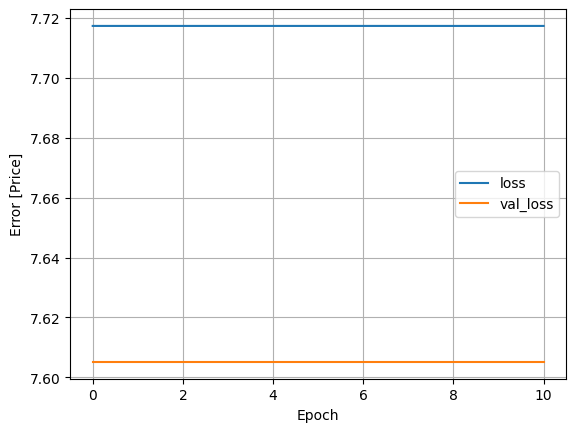

In [44]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)

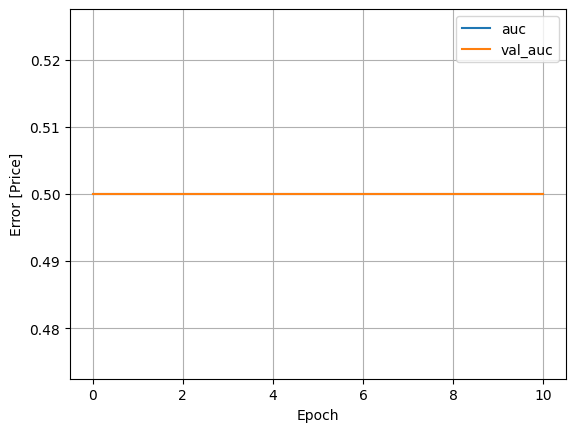

In [45]:
plt.plot(history.history['auc'], label='auc')
plt.plot(history.history['val_auc'], label='val_auc')
plt.xlabel('Epoch')
plt.ylabel('Error [Price]')
plt.legend()
plt.grid(True)